In [2109]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



In [2110]:
stocks_price_df = pd.read_csv("/Users/mac/Desktop/casestudy3data/PythonforFinancialAnalysis/Part 2. Financial Analysis in Python/stock.csv")
stocks_price_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [2111]:
stocks_vol_df = pd.read_csv("/Users/mac/Desktop/casestudy3data/PythonforFinancialAnalysis/Part 3. AI and ML in Finance/stock_volume.csv")
stocks_vol_df.head()

Date      AAPL       BA         T       MGM     AMZN      IBM  \
0  2012-01-12  53146800  3934500  26511100  17891100  5385800  6881000   
1  2012-01-13  56505400  4641100  22096800  16621800  4753500  5279200   
2  2012-01-17  60724300  3700100  23500200  15480800  5644500  6003400   
3  2012-01-18  69197800  4189500  22015000  18387600  7473500  4600600   
4  2012-01-19  65434600  5397300  25524000  14022900  7096000  8567200   

      TSLA      GOOG       sp500  
0   729300   3764400  4019890000  
1  5500400   4631800  3692370000  
2  4651600   3832800  4010490000  
3  1260200   5544000  4096160000  
4  1246300  12657800  4465890000

In [2112]:
stocks_vol_df = stocks_vol_df.sort_values(by=['Date'])
stocks_price_df = stocks_price_df.sort_values(by=['Date'])

In [2113]:
stocks_price_df.columns = ["Date"] + [col + "_Price" for col in stocks_price_df.columns[1:]]
stocks_vol_df.columns = ["Date"] + [col + "_Volume" for col in stocks_vol_df.columns[1:]]

In [2114]:
# Combine the files using Date
data = pd.merge(stocks_price_df, stocks_vol_df, on="Date")
data.head()

Date  AAPL_Price   BA_Price    T_Price  MGM_Price  AMZN_Price  \
0  2012-01-12   60.198570  75.510002  30.120001      12.13  175.929993   
1  2012-01-13   59.972858  74.599998  30.070000      12.35  178.419998   
2  2012-01-17   60.671429  75.239998  30.250000      12.25  181.660004   
3  2012-01-18   61.301430  75.059998  30.330000      12.73  189.440002   
4  2012-01-19   61.107143  75.559998  30.420000      12.80  194.449997   

    IBM_Price  TSLA_Price  GOOG_Price  sp500_Price  AAPL_Volume  BA_Volume  \
0  180.550003   28.250000  313.644379  1295.500000     53146800    3934500   
1  179.160004   22.790001  311.328064  1289.089966     56505400    4641100   
2  180.000000   26.600000  313.116364  1293.670044     60724300    3700100   
3  181.070007   26.809999  315.273285  1308.040039     69197800    4189500   
4  180.520004   26.760000  318.590851  1314.500000     65434600    5397300   

   T_Volume  MGM_Volume  AMZN_Volume  IBM_Volume  TSLA_Volume  GOOG_Volume  \
0  26511100    17891100      5385800     6881000       729300      3764400   
1  22096800    16621800      4753500     5279200      5500400      4631800   
2  23500200    15480800      5644500     6003400      4651600      3832800   
3  22015000    18387600      7473500     4600600      1260200      5544000   
4  25524000    14022900      7096000     8567200      1246300     12657800   

   sp500_Volume  
0    4019890000  
1    3692370000  
2    4010490000  
3    4096160000  
4    4465890000

In [2115]:
data["Date"] = pd.to_datetime(data["Date"], errors='coerce')

In [2116]:
stocks_list = ["AAPL", "BA", "T", "MGM", "AMZN", "IBM", "TSLA", "GOOG"]

In [2117]:
#Calculate daily price change (return) for each stock
for stock in stocks_list:
    data[stock + "_Return"] = (data[stock + "_Price" ].pct_change()) *100

In [2118]:
summary_stats = data[[stock + "_Price" for stock in stocks_list] + ["sp500_Price"]].describe()
summary_stats

AAPL_Price     BA_Price      T_Price    MGM_Price   AMZN_Price  \
count  2159.000000  2159.000000  2159.000000  2159.000000  2159.000000   
mean    140.819823   189.942700    35.162899    23.105743   915.665665   
std      70.827601   103.678586     3.207490     6.963847   697.838905   
min      55.790001    67.239998    26.770000     7.140000   175.929993   
25%      89.165714   124.015000    33.040001    18.545000   316.490005   
50%     116.599998   142.419998    34.930000    23.780001   676.010010   
75%     175.019997   297.044998    37.419998    28.430000  1593.645019   
max     455.609985   440.619995    43.470001    38.029999  3225.000000   

         IBM_Price   TSLA_Price   GOOG_Price  sp500_Price  
count  2159.000000  2159.000000  2159.000000  2159.000000  
mean    161.853001   259.600815   783.712512  2218.749554  
std      25.561938   210.988003   334.448057   537.321727  
min      94.769997    22.790001   278.481171  1278.040039  
25%     142.769997   184.595001   527.214416  1847.984985  
50%     156.949997   231.960007   737.599976  2106.629883  
75%     185.974998   307.350006  1079.744995  2705.810059  
max     215.800003  1643.000000  1568.489990  3386.149902

In [2119]:
tech_returns = data[[stock + "_Return" for stock in ["AAPL", "AMZN", "GOOG", "TSLA", "IBM"]]].mean().mean()
non_tech_returns = data[[stock + "_Return" for stock in ["BA", "T", "MGM"]]].mean().mean()
print("Tech Average Return:", tech_returns)
print("Non-Tech Average Return:", non_tech_returns)

Tech Average Return: 0.11515663899244433
Non-Tech Average Return: 0.046263946952120695


In [2120]:
tech_volatility = data[['AAPL_Return', 'AMZN_Return', 'GOOG_Return', 'TSLA_Return', 'IBM_Return']].std()
non_tech_volatility = data[['BA_Return', 'T_Return', 'MGM_Return']].std()
print('Technology Volatility are : \n {}'.format(tech_volatility))
print('Non Technology Volatility are : \n {}'.format(non_tech_volatility))

Technology Volatility are : 
 AAPL_Return    1.776178
AMZN_Return    1.928261
GOOG_Return    1.585924
TSLA_Return    3.430817
IBM_Return     1.431323
dtype: float64
Non Technology Volatility are : 
 BA_Return     2.260341
T_Return      1.265145
MGM_Return    2.747226
dtype: float64


In [2121]:
volume_cols = [f'{stock}_Volume' for stock in ['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG']]
thresholds = data[volume_cols].quantile(0.75)
print("75th Percentile Trading Volumes:\n", thresholds)

75th Percentile Trading Volumes:
 AAPL_Volume    71824800.0
BA_Volume       5325900.0
T_Volume       32105650.0
MGM_Volume     11040550.0
AMZN_Volume     4768150.0
IBM_Volume      4937300.0
TSLA_Volume     8619550.0
GOOG_Volume     3245350.0
Name: 0.75, dtype: float64


In [2122]:
# Initialize lists to store volatilities
tech_stocks = ['AAPL', 'AMZN', 'GOOG', 'TSLA', 'IBM']
non_tech_stocks = ['BA', 'T', 'MGM']
tech_volatilities = []
non_tech_volatilities = []

# Calculate volatility for high-volume days
for stock in tech_stocks:
    high_volume_days = data[data[f'{stock}_Volume'] > thresholds[f'{stock}_Volume']]
    volatility = high_volume_days[f'{stock}_Return'].std()
    tech_volatilities.append(volatility)

for stock in non_tech_stocks:
    high_volume_days = data[data[f'{stock}_Volume'] > thresholds[f'{stock}_Volume']]
    volatility = high_volume_days[f'{stock}_Return'].std()
    non_tech_volatilities.append(volatility)

vol_data = pd.DataFrame({
    'Stock': tech_stocks + non_tech_stocks,
    'Volatility': tech_volatilities + non_tech_volatilities,
    'Sector': ['Technology'] * len(tech_stocks) + ['Non-Technology'] * len(non_tech_stocks)
})
vol_data.sort_values(by='Volatility',ascending=False)

Stock  Volatility          Sector
3  TSLA    5.541462      Technology
7   MGM    4.759154  Non-Technology
5    BA    4.119634  Non-Technology
1  AMZN    3.288063      Technology
0  AAPL    2.532933      Technology
4   IBM    2.445781      Technology
2  GOOG    2.283465      Technology
6     T    2.138497  Non-Technology

In [2123]:
fig = px.bar(
    vol_data,
    x='Stock',
    y='Volatility',
    color='Sector',
    title='Volatility on High-Volume Days (>75th Percentile)',
    labels={'Volatility': 'Standard Deviation of Daily Returns'}
)
fig.update_layout(width=1000, height=600, title_x=0.5)
fig.show()

In [2124]:

#Plot stock prices over time
fig = px.line(data, x="Date", y=["AAPL_Price", "T_Price", "BA_Price", "MGM_Price", "AMZN_Price", "IBM_Price","TSLA_Price","GOOG_Price","sp500_Price"],
              title="Stock Prices (2012-2020)")
fig.update_layout(
        title_x=0.5,  # Centering the title
        width=1000,   # Width of the figure (increase for larger)
        height=600,   # Height of the figure (increase for larger)
        font=dict(size=14)  # Font size for readability
    )
fig.show()

In [2125]:
# Plot trading volumes over time
fig = px.line(data, x="Date", y=["AAPL_Volume", "T_Volume", "BA_Volume", "MGM_Volume", "AMZN_Volume", "IBM_Volume","TSLA_Volume","GOOG_Volume","sp500_Volume"],
              title="Trading Volumes (2012-2020)")
fig.update_layout(
        title_x=0.5,  # Centering the title
        width=1000,   # Width of the figure (increase for larger)
        height=600,   # Height of the figure (increase for larger)
        font=dict(size=14)  # Font size for readability
    )
fig.show()

In [2126]:
def normalize(df):
    x = df.copy()
    for i in df.columns[1:]:
        x[i] = x[i]/x[i][0]
    return x

In [2127]:
def interactive_plot(df, title):
    fig = px.line(title=title)
    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date'], y=df[i], name=i)
        
    fig.update_layout(
        title=title,
        title_x=0.5,  # Centering the title
        width=1000,   # Width of the figure (increase for larger)
        height=600,   # Height of the figure (increase for larger)
        font=dict(size=14)  # Font size for readability
    )
    fig.show()

In [2128]:
stock_price = data[["Date"] + [stock + "_Price" for stock in stocks_list] + ["sp500_Price"]]
interactive_plot(normalize(stock_price),'Normalize Stock Price')

In [2129]:
stock_volume = data[["Date"]+ [stock + "_Volume" for stock in stocks_list] + ["sp500_Volume"]]
interactive_plot(normalize(stock_volume),'Normalize Stock Volume')

In [2130]:
data["sp500_Return"] = (data["sp500_Price"].pct_change())*100

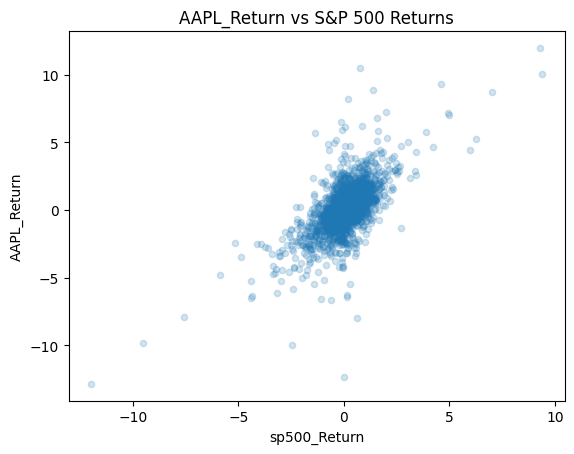

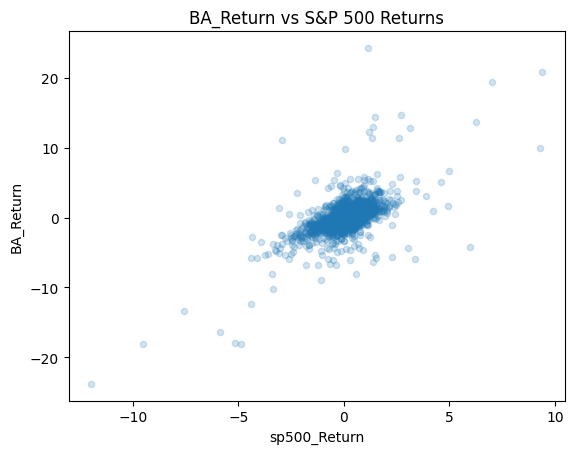

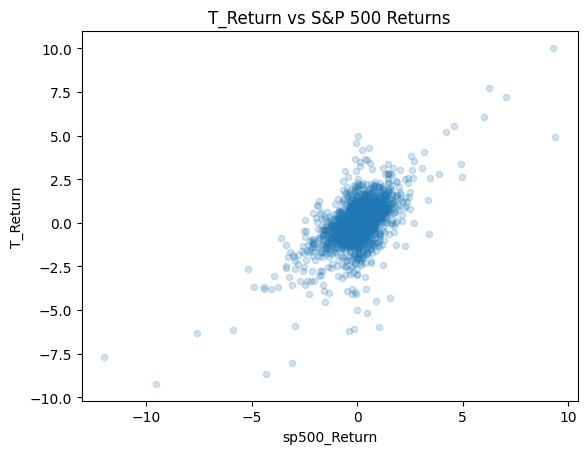

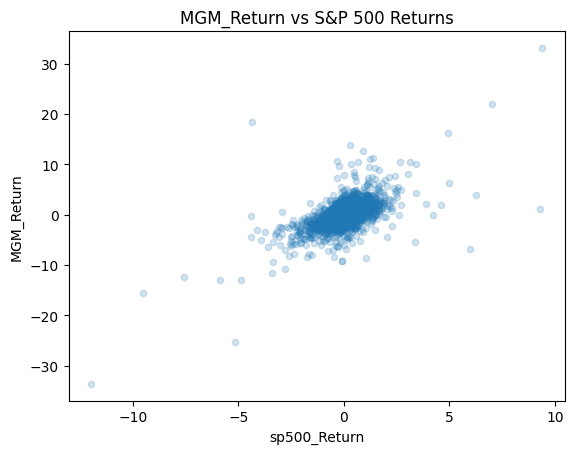

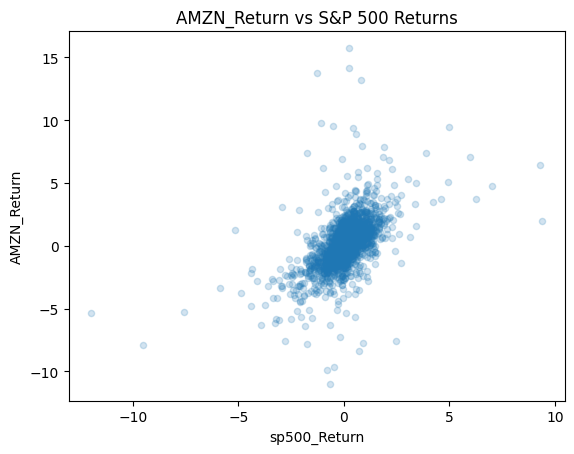

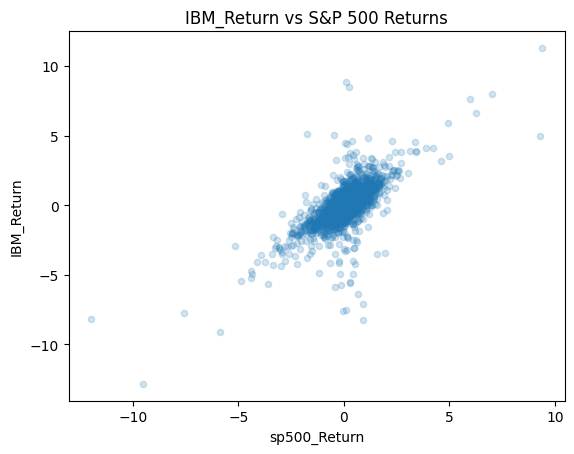

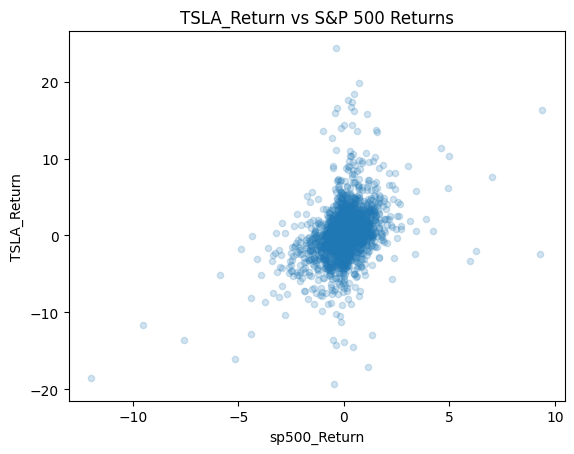

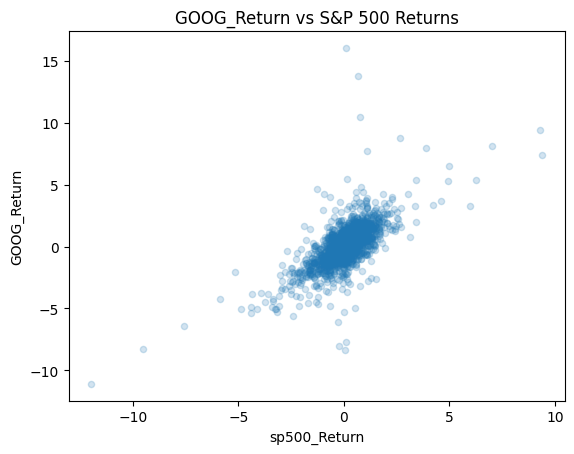

In [2131]:
# Scatter plot of all stock returns vs S&P 500 returns
stock_scatter = data[[stock + "_Return" for stock in stocks_list] + ["sp500_Return"]]

for i in stock_scatter.columns:
    if  i != 'sp500_Return':
         stock_scatter.plot(kind='scatter',x='sp500_Return', y= i,title=f"{i} vs S&P 500 Returns", alpha=0.2)


    
plt.show()

<Axes: >

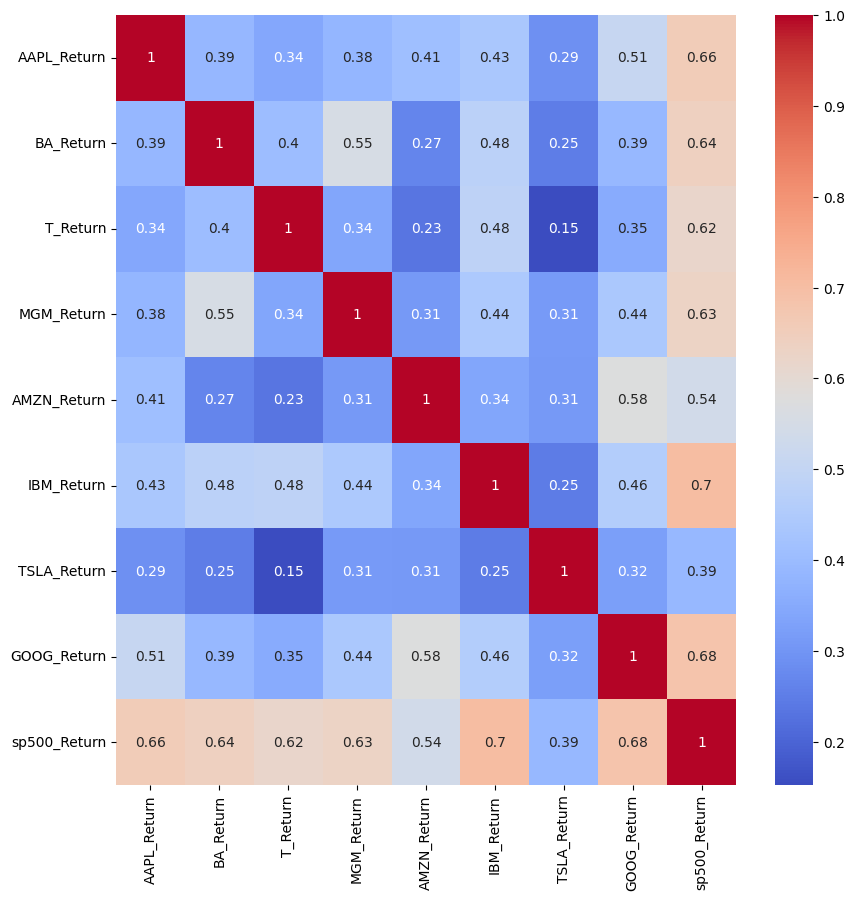

In [2132]:
correlations = data[[stock + "_Return" for stock in stocks_list] + ["sp500_Return"]].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlations, annot=True, cmap="coolwarm")

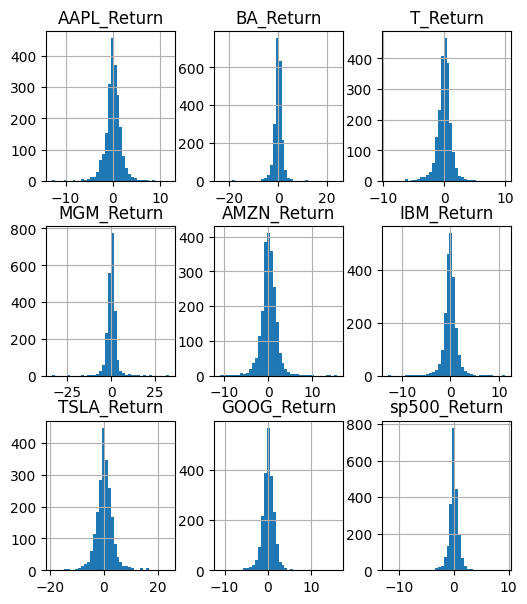

In [2133]:
data[[stock + "_Return" for stock in stocks_list] + ["sp500_Return"]].hist(figsize=(6,7), bins =40);

In [2134]:
stock_return =data[[stock + "_Return" for stock in stocks_list] + ["sp500_Return"]]
stock_return.iloc[0] = stock_return.iloc[0].fillna(0)
stock_return

AAPL_Return  BA_Return  T_Return  MGM_Return  AMZN_Return  IBM_Return  \
0        0.000000   0.000000  0.000000    0.000000     0.000000    0.000000   
1       -0.374946  -1.205144 -0.166006    1.813685     1.415339   -0.769869   
2        1.164812   0.857909  0.598603   -0.809717     1.815943    0.468852   
3        1.038382  -0.239234  0.264463    3.918367     4.282725    0.594448   
4       -0.316937   0.666134  0.296736    0.549882     2.644634   -0.303752   
...           ...        ...       ...         ...          ...         ...   
2154     0.362467   5.579446 -0.533156    0.000000     2.109065   -0.309917   
2155     3.488923  -1.193483 -0.033501   10.406699     0.623082    0.534082   
2156    -2.449458  -1.265966  0.603217    3.087768    -1.784187   -0.919762   
2157     1.453480   5.522880  0.599604   13.767729    -0.609323    1.720552   
2158    -2.973987   0.401316  0.000000   -0.692841    -2.143792   -0.283220   

      TSLA_Return  GOOG_Return  sp500_Return  
0        0.000000     0.000000      0.000000  
1      -19.327430    -0.738516     -0.494792  
2       16.717854     0.574410      0.355295  
3        0.789470     0.688856      1.110793  
4       -0.186494     1.052283      0.493866  
...           ...          ...           ...  
2154    -0.133153     0.589774      0.642974  
2155     0.307062     1.797626      0.642770  
2156    -2.475194    -0.373974      0.063303  
2157    -2.350092     0.107728      0.274222  
2158    -3.114399    -1.054744     -0.796913  

[2159 rows x 9 columns]

In [2135]:
df_hist = stock_return.copy()
data_hist = []

for i in df_hist.columns:
    data_hist.append(stock_return[i].values)
data_hist

[array([ 0.        , -0.37494578,  1.16481192, ..., -2.44945751,
         1.45347999, -2.9739868 ]),
 array([ 0.        , -1.20514366,  0.85790887, ..., -1.26596576,
         5.52287953,  0.40131597]),
 array([ 0.        , -0.16600597,  0.59860326, ...,  0.60321716,
         0.5996036 ,  0.        ]),
 array([ 0.        ,  1.81368508, -0.8097166 , ...,  3.08776831,
        13.76772918, -0.69284065]),
 array([ 0.        ,  1.41533854,  1.8159433 , ..., -1.78418726,
        -0.60932259, -2.14379167]),
 array([ 0.        , -0.76986928,  0.46885241, ..., -0.91976211,
         1.72055219, -0.28322004]),
 array([  0.        , -19.32743009,  16.71785359, ...,  -2.47519409,
         -2.35009162,  -3.1143992 ]),
 array([ 0.        , -0.73851634,  0.57441015, ..., -0.37397414,
         0.10772812, -1.05474435]),
 array([ 0.        , -0.49479228,  0.35529545, ...,  0.06330295,
         0.27422185, -0.79691324])]

In [2136]:
fig = ff.create_distplot(data_hist, df_hist.columns)
fig.update_layout(
        title='Daily Returns Interactive histogram',
        title_x=0.5,  # Centering the title
        width=1000,   # Width of the figure (increase for larger)
        height=600,   # Height of the figure (increase for larger)
        font=dict(size=14)  # Font size for readability
    )
fig.show()

MODEL BUILING RIDGE REGRESSION/L2 REGULARIZATION

RIDGE REGRESSION FOR TECHNOLOGY (APPLE) USING (APPLE PRICE, AAPL_VOLUME AND SP500)

In [2137]:
AAPL_combined = data[['Date','AAPL_Price', 'AAPL_Volume','sp500_Price']]
AAPL_combined['Target'] = data['AAPL_Price'].shift(-1)
AAPL_combined = AAPL_combined[:-1]

# Select features and target
X_apl_rg = AAPL_combined[['AAPL_Price', 'AAPL_Volume', 'sp500_Price']]
y_apl_rg = AAPL_combined['Target']

scaler = MinMaxScaler()
X_apl_scaled = scaler.fit_transform(X_apl_rg)

# Split into train/test (80%/20%)
X_aplrg_train, X_aplrg_test, y_aplrg_train, y_aplrg_test = train_test_split(X_apl_scaled, y_apl_rg, test_size=0.2, random_state=42)

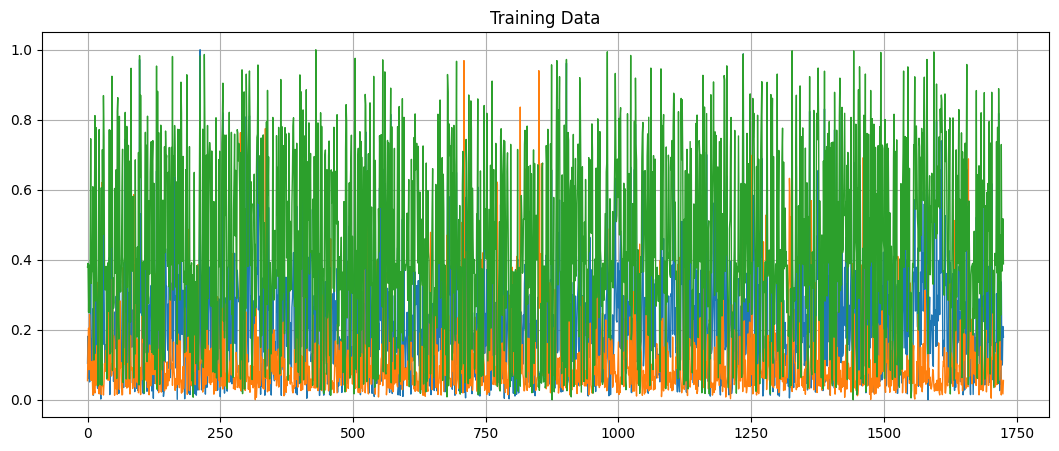

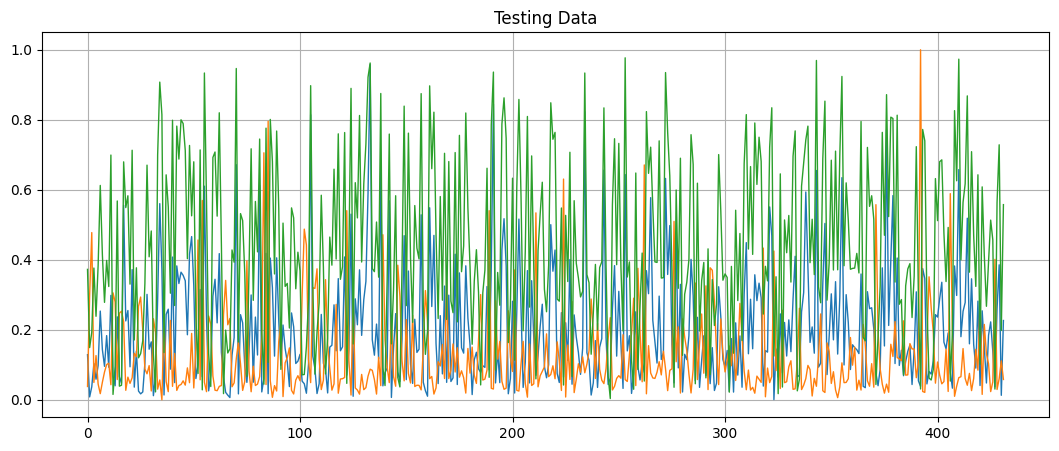

In [2138]:
#define data plotting function
def show_plot(data, title):
    plt.figure(figsize=(13,5))
    plt.plot(data, linewidth=1)
    plt.title(title)
    plt.grid()

show_plot(X_aplrg_train, 'Training Data')
show_plot(X_aplrg_test, 'Testing Data')

In [2139]:
# Initialize and train Ridge Regression model
# AAPLt+1​ =w1⋅AAPLt + w⋅Volumet + w.sp500_Price + b

def train_fit_model(X_train, y_train, X_test, y_test):
        model = Ridge(alpha=1.0)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print('MSE: ', mse)
        print('R_Score: ', r2)
        return y_pred, model

In [2140]:
y_pred_aplrg, model_aplrg = train_fit_model(X_aplrg_train, y_aplrg_train, X_aplrg_test, y_aplrg_test)

MSE:  19.238304718056824
R_Score:  0.995728814473169


In [2141]:
def actual_predict_plot(y_test, y_pred, label1, label2):
    plt.plot(y_test.values, label=label1)
    plt.plot(y_pred, label=label2)
    plt.title(f'{label1} vs {label2} Prices')
    plt.legend()

def scatter_plot(y_test, y_pred, label1, label2):
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel(f'{label1} Price')
    plt.ylabel(f'{label2} Price')
    plt.title(f'{label1} vs {label2} Prices')

def residual_plot(y_test, y_pred, color):
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(0, color=color, linestyle='--')
    plt.xlabel('Predicted Price')
    plt.ylabel('Residuals')
    plt.title('Residuals Plot')

def histgraph(y_test, y_pred):
    residuals = y_test - y_pred
    sns.histplot(residuals, bins=30, kde=True)
    plt.title("Distribution of Residuals")     

def feature_importance_plot(X, model):
    coefficients = model.coef_
    features = X.columns  # if X is a DataFrame
    plt.bar(features, coefficients)
    plt.title("Feature Coefficients (Ridge)")
    plt.xticks(rotation=45)

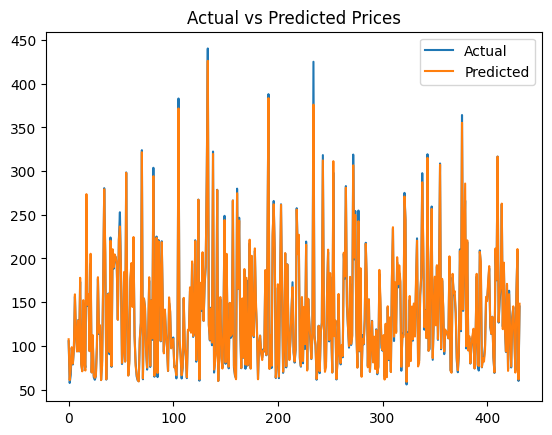

In [2142]:
actual_predict_plot(y_aplrg_test, y_pred_aplrg, 'Actual', 'Predicted' )

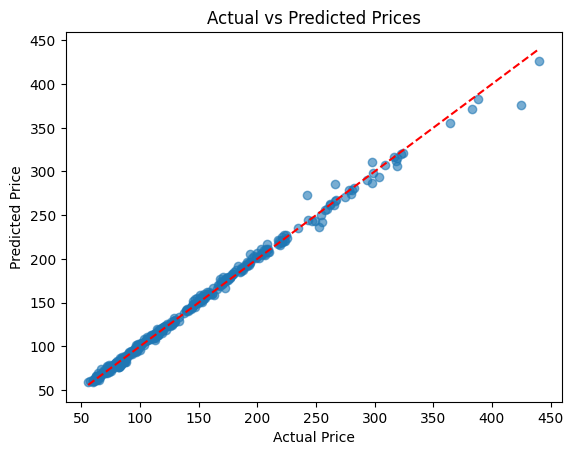

In [2143]:
scatter_plot(y_aplrg_test,y_pred_aplrg,'Actual', 'Predicted')

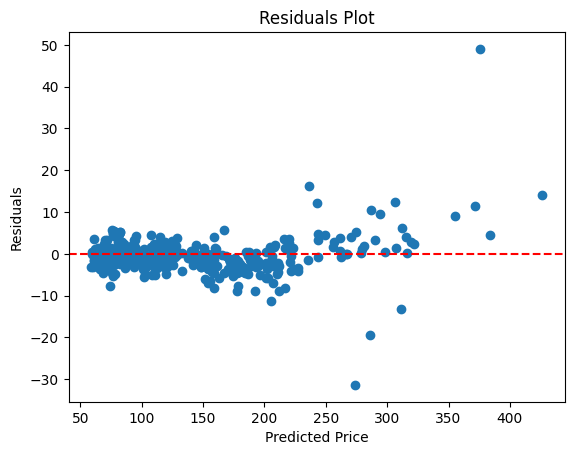

In [2144]:
residual_plot(y_aplrg_test,y_pred_aplrg, 'red')

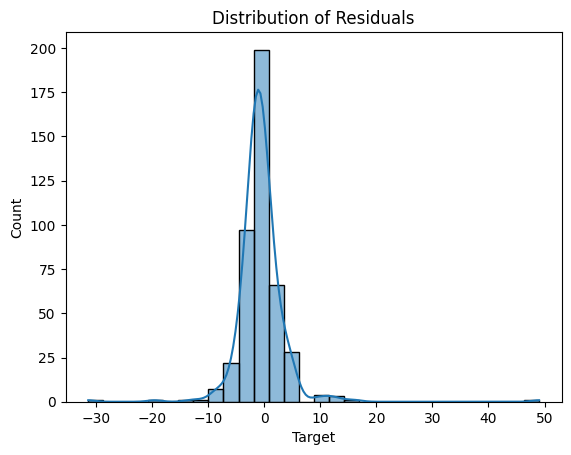

In [2145]:
histgraph(y_aplrg_test,y_pred_aplrg)

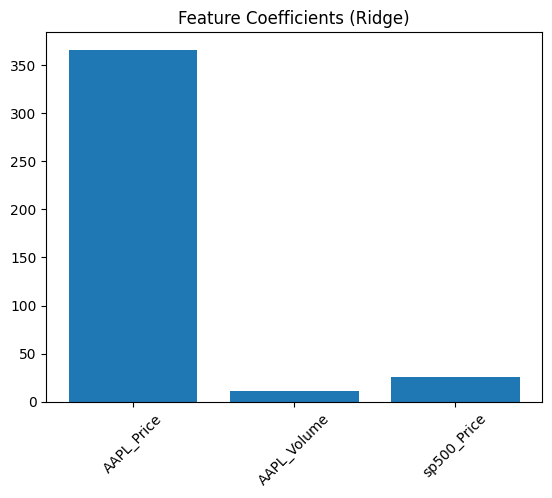

In [2146]:
feature_importance_plot(X_apl_rg, model_aplrg)

RIDGE REGRESSION FOR NON-TECHNOLOGY USING (MGM PRICE, MGM_VOLUME AND SP500)

In [2147]:

MGM_combined = data[['Date','MGM_Price', 'MGM_Volume','sp500_Price']]
MGM_combined['Target'] = data['MGM_Price'].shift(-1)
MGM_combined = MGM_combined[:-1]

# Select features and target
X_mgm_rg = MGM_combined[['MGM_Price', 'MGM_Volume', 'sp500_Price']]
y_mgm_rg = MGM_combined['Target']

scaler = MinMaxScaler()
X_mgm_scaled = scaler.fit_transform(X_mgm_rg)

# Split into train/test (80%/20%)
X_mgmrg_train, X_mgmrg_test, y_mgmrg_train, y_mgmrg_test = train_test_split(X_mgm_scaled, y_mgm_rg, test_size=0.2, random_state=42)

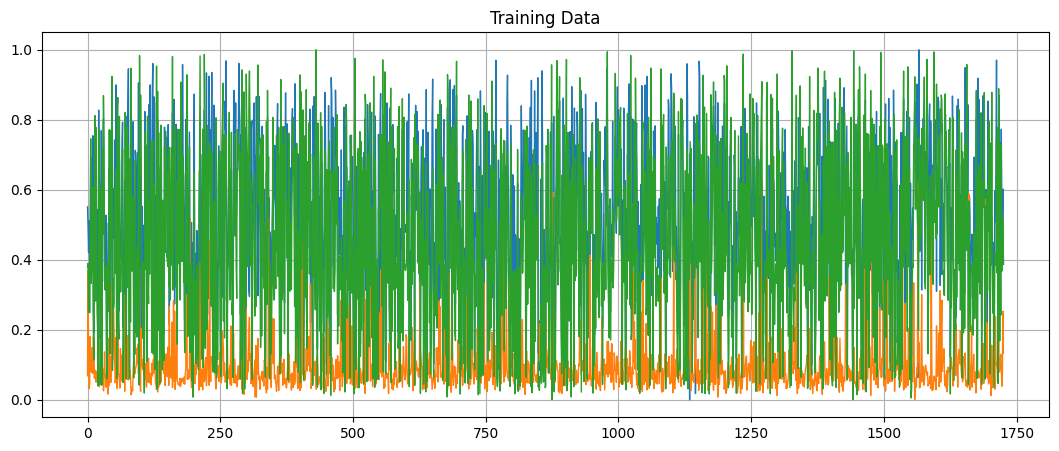

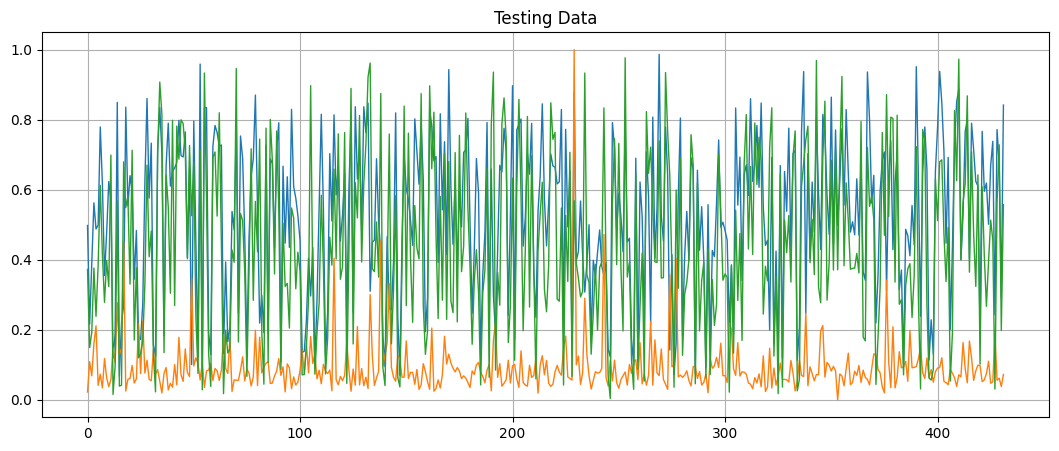

In [2148]:
show_plot(X_mgmrg_train, 'Training Data')
show_plot(X_mgmrg_test, 'Testing Data')

In [2149]:
y_pred_mgmrg, model_mgmrg = train_fit_model(X_mgmrg_train, y_mgmrg_train, X_mgmrg_test, y_mgmrg_test)

MSE:  0.3422197773449757
R_Score:  0.9929100887577733


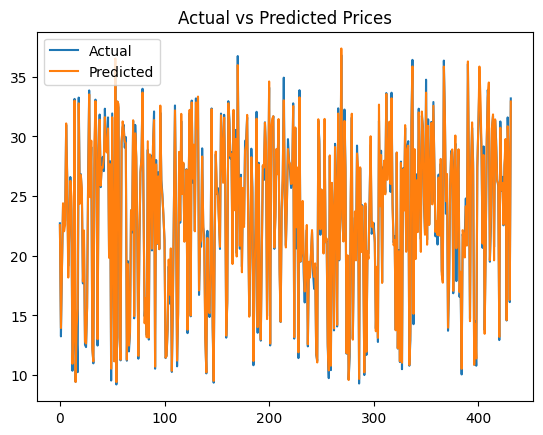

In [2150]:
actual_predict_plot(y_mgmrg_test, y_pred_mgmrg, 'Actual', 'Predicted' )


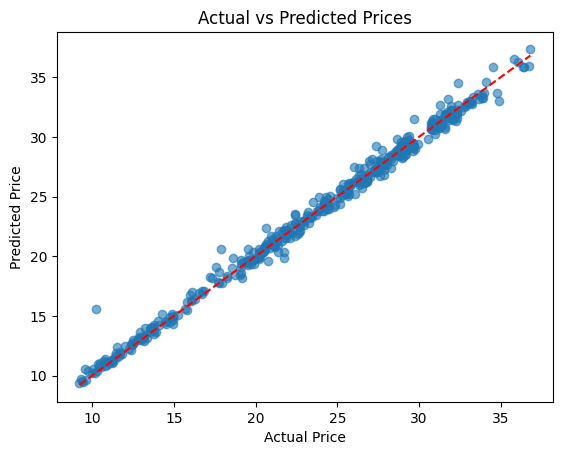

In [2151]:
scatter_plot(y_mgmrg_test,y_pred_mgmrg,'Actual', 'Predicted')


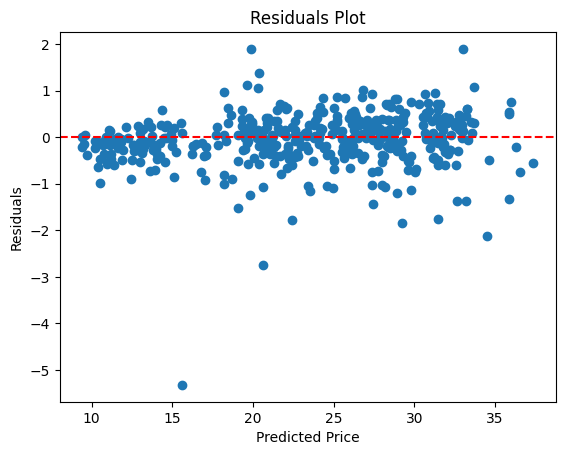

In [2152]:
residual_plot(y_mgmrg_test,y_pred_mgmrg, 'red')


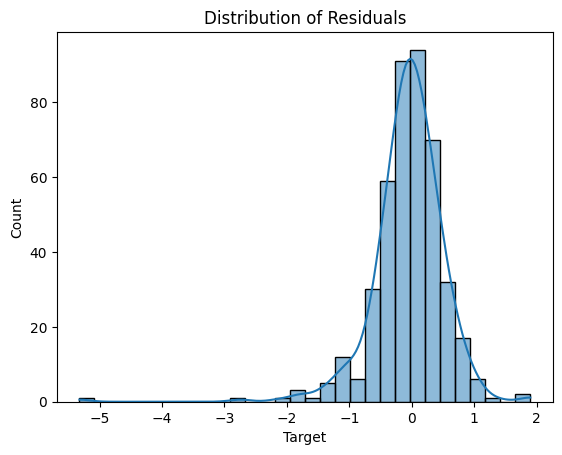

In [2153]:
histgraph(y_mgmrg_test,y_pred_mgmrg)


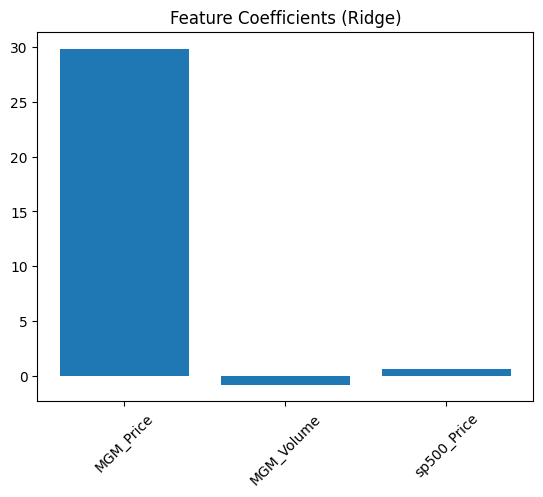

In [2154]:
feature_importance_plot(X_mgm_rg, model_mgmrg)

ADDING NEW FEATURES TO MY MODEL BY DOING FEATURE ENGINEERING

In [2155]:
# Yesterday’s price, 2-day lag
data['AAPL_lag1'] = data['AAPL_Price'].shift(1)
data['AAPL_lag2'] = data['AAPL_Price'].shift(2)
data['MGM_lag1'] = data['MGM_Price'].shift(1)
data['MGM_lag2'] = data['MGM_Price'].shift(2)

#Rolling 5-day standard deviation of returns
data['AAPL_volatility_5'] = data['AAPL_Return'].rolling(5).std()
data['MGM_volatility_5'] = data['MGM_Return'].rolling(5).std()

# Average closing price over past 3days
data['AAPL_sma_3'] = data['AAPL_Price'].rolling(3).mean()
data['MGM_sma_3'] = data['MGM_Price'].rolling(3).mean()

#S&P 500 lagged values/ yesterday price
data['sp500_lag1'] = data['sp500_Price'].shift(1)

In [2156]:
data.head()

Date  AAPL_Price   BA_Price    T_Price  MGM_Price  AMZN_Price  \
0 2012-01-12   60.198570  75.510002  30.120001      12.13  175.929993   
1 2012-01-13   59.972858  74.599998  30.070000      12.35  178.419998   
2 2012-01-17   60.671429  75.239998  30.250000      12.25  181.660004   
3 2012-01-18   61.301430  75.059998  30.330000      12.73  189.440002   
4 2012-01-19   61.107143  75.559998  30.420000      12.80  194.449997   

    IBM_Price  TSLA_Price  GOOG_Price  sp500_Price  ...  sp500_Return  \
0  180.550003   28.250000  313.644379  1295.500000  ...           NaN   
1  179.160004   22.790001  311.328064  1289.089966  ...     -0.494792   
2  180.000000   26.600000  313.116364  1293.670044  ...      0.355295   
3  181.070007   26.809999  315.273285  1308.040039  ...      1.110793   
4  180.520004   26.760000  318.590851  1314.500000  ...      0.493866   

   AAPL_lag1  AAPL_lag2  MGM_lag1  MGM_lag2  AAPL_volatility_5  \
0        NaN        NaN       NaN       NaN                NaN   
1  60.198570        NaN     12.13       NaN                NaN   
2  59.972858  60.198570     12.35     12.13                NaN   
3  60.671429  59.972858     12.25     12.35                NaN   
4  61.301430  60.671429     12.73     12.25                NaN   

   MGM_volatility_5  AAPL_sma_3  MGM_sma_3   sp500_lag1  
0               NaN         NaN        NaN          NaN  
1               NaN         NaN        NaN  1295.500000  
2               NaN   60.280952  12.243333  1289.089966  
3               NaN   60.648572  12.443333  1293.670044  
4               NaN   61.026667  12.593333  1308.040039  

[5 rows x 37 columns]

In [2157]:
features = [
    'AAPL_Price', 'AAPL_lag1', 'AAPL_lag2', 'AAPL_Return',
    'AAPL_volatility_5', 'AAPL_sma_3', 'AAPL_Volume',
    'sp500_Price', 'sp500_Return', 'sp500_lag1','AAPL_target'
]

data['AAPL_target'] = data['AAPL_Price'].shift(-1)


In [2158]:
data.head()

Date  AAPL_Price   BA_Price    T_Price  MGM_Price  AMZN_Price  \
0 2012-01-12   60.198570  75.510002  30.120001      12.13  175.929993   
1 2012-01-13   59.972858  74.599998  30.070000      12.35  178.419998   
2 2012-01-17   60.671429  75.239998  30.250000      12.25  181.660004   
3 2012-01-18   61.301430  75.059998  30.330000      12.73  189.440002   
4 2012-01-19   61.107143  75.559998  30.420000      12.80  194.449997   

    IBM_Price  TSLA_Price  GOOG_Price  sp500_Price  ...  AAPL_lag1  AAPL_lag2  \
0  180.550003   28.250000  313.644379  1295.500000  ...        NaN        NaN   
1  179.160004   22.790001  311.328064  1289.089966  ...  60.198570        NaN   
2  180.000000   26.600000  313.116364  1293.670044  ...  59.972858  60.198570   
3  181.070007   26.809999  315.273285  1308.040039  ...  60.671429  59.972858   
4  180.520004   26.760000  318.590851  1314.500000  ...  61.301430  60.671429   

   MGM_lag1  MGM_lag2  AAPL_volatility_5  MGM_volatility_5  AAPL_sma_3  \
0       NaN       NaN                NaN               NaN         NaN   
1     12.13       NaN                NaN               NaN         NaN   
2     12.35     12.13                NaN               NaN   60.280952   
3     12.25     12.35                NaN               NaN   60.648572   
4     12.73     12.25                NaN               NaN   61.026667   

   MGM_sma_3   sp500_lag1  AAPL_target  
0        NaN          NaN    59.972858  
1        NaN  1295.500000    60.671429  
2  12.243333  1289.089966    61.301430  
3  12.443333  1293.670044    61.107143  
4  12.593333  1308.040039    60.042858  

[5 rows x 38 columns]

In [2159]:
correlation_with_target = data[features].corr(numeric_only=True)['AAPL_target'].abs().sort_values(ascending=False)
correlation_with_target

AAPL_target          1.000000
AAPL_Price           0.998948
AAPL_sma_3           0.998611
AAPL_lag1            0.998227
AAPL_lag2            0.997357
sp500_Price          0.891617
sp500_lag1           0.890992
AAPL_Volume          0.456273
AAPL_volatility_5    0.143046
AAPL_Return          0.057750
sp500_Return         0.010569
Name: AAPL_target, dtype: float64

In [2160]:
final_features = [
    'AAPL_lag1',          # yesterday's price
    'AAPL_volatility_5',  # short-term volatility
    'AAPL_Return',        # daily return
    'AAPL_Volume',        # current volume
    'sp500_Price',              # market price today
    'sp500_lag1',
    'AAPL_target'        
   
]
data_model = data[final_features]

In [2161]:
data_model.dropna()

AAPL_lag1  AAPL_volatility_5  AAPL_Return  AAPL_Volume  sp500_Price  \
5      61.107143           1.193614    -1.741670    103493600  1315.380005   
6      60.042858           1.392498     1.691647     76515600  1316.000000   
7      61.058571           1.546714    -1.637772    136909500  1314.650024   
8      60.058571           3.319264     6.243905    239578500  1326.060059   
9      63.808571           3.331877    -0.454486     80996300  1318.430054   
...          ...                ...          ...          ...          ...   
2153  435.750000           4.037167     0.667815     43267900  3306.510010   
2154  438.660004           4.230951     0.362467     30498000  3327.770020   
2155  440.250000           4.104614     3.488923     50607200  3349.159912   
2156  455.609985           2.285075    -2.449458     49453300  3351.280029   
2157  444.450012           2.143581     1.453480     53100900  3360.469971   

       sp500_lag1  AAPL_target  
5     1314.500000    61.058571  
6     1315.380005    60.058571  
7     1316.000000    63.808571  
8     1314.650024    63.518570  
9     1326.060059    63.897144  
...           ...          ...  
2153  3294.610107   440.250000  
2154  3306.510010   455.609985  
2155  3327.770020   444.450012  
2156  3349.159912   450.910004  
2157  3351.280029   437.500000  

[2153 rows x 7 columns]

In [2162]:
data_model = data_model.dropna()

RIDGE REGRESSION OF TECHNOLOGY (APPLE STOCK) AFTER ADDING NEW FEATURES

In [2163]:
X = data_model.drop(columns=['AAPL_target'])
y = data_model['AAPL_target']

In [2164]:
X.isnull().sum()

AAPL_lag1            0
AAPL_volatility_5    0
AAPL_Return          0
AAPL_Volume          0
sp500_Price          0
sp500_lag1           0
dtype: int64

In [2165]:

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [2166]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [2167]:
y_pred, model = train_fit_model(X_train, y_train, X_test, y_test)

MSE:  23.53241319907924
R_Score:  0.9953815864373011


In [2168]:
results_apple = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
results_apple.reset_index(drop=True, inplace=True)
results_apple

Actual   Predicted
0    179.100006  179.376406
1    166.440002  169.152387
2    115.400002  116.894758
3     61.400002   61.650084
4    170.410004  174.756431
..          ...         ...
426   81.705711   92.216069
427  220.419998  222.330894
428  127.419998  126.698487
429  117.290001  113.210833
430   74.820000   74.652018

[431 rows x 2 columns]

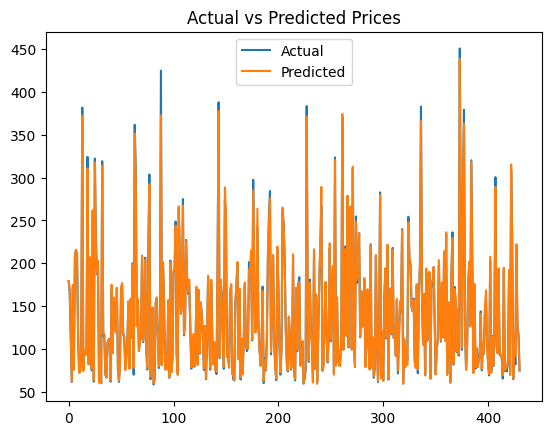

In [2169]:
actual_predict_plot(y_test, y_pred, 'Actual', 'Predicted' )

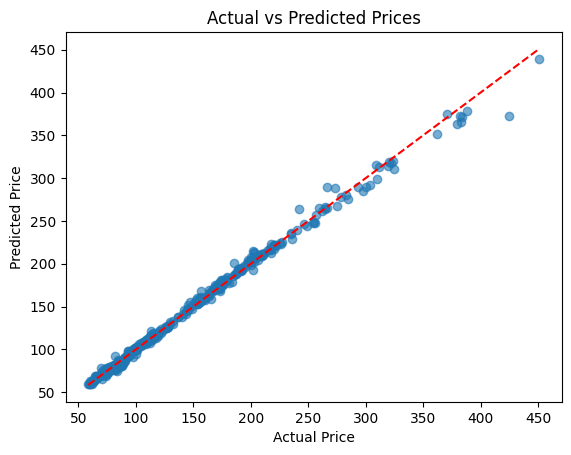

In [2170]:
scatter_plot(y_test,y_pred,'Actual', 'Predicted')

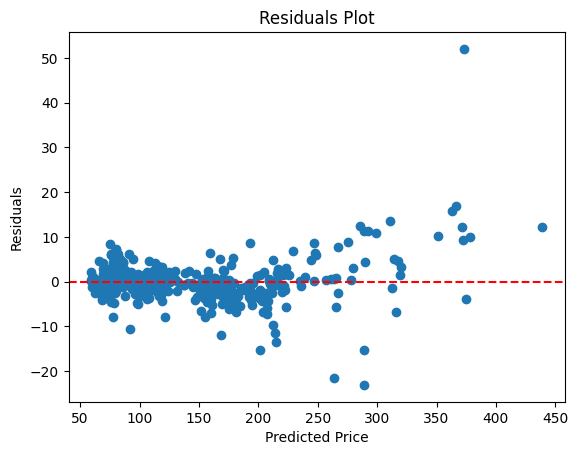

In [2171]:
residual_plot(y_test,y_pred, 'red')

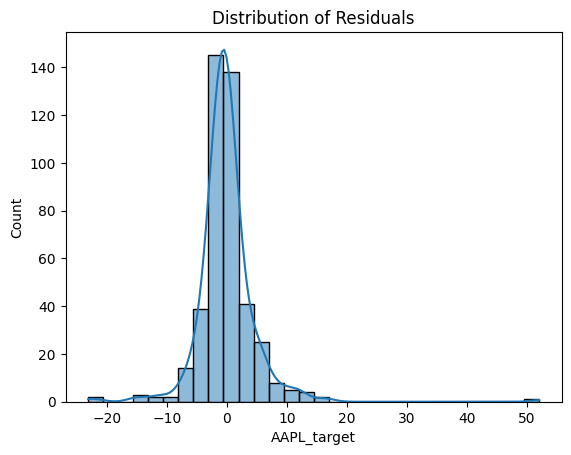

In [2172]:
histgraph(y_test,y_pred)

RIDGE REGERESSION OF NON-TECHNOLOGY AFTER ADDING NEW FEATURES

In [2173]:
data['MGML_target'] = data['MGM_Price'].shift(-1)

In [2174]:
data.rename(columns={'MGML_target' : 'MGM_target'}, inplace=True)

In [2175]:
mgm_features = [
    'MGM_lag1',          # yesterday's price
    'MGM_volatility_5',  # short-term volatility
    'MGM_Return',        # daily return
    'MGM_Volume',        # current volume
    'sp500_Price',              # market price today
    'sp500_lag1',
    'MGM_target'        
   
]

In [2176]:
mgm_model = data[mgm_features].dropna()
mgm_model

MGM_lag1  MGM_volatility_5  MGM_Return  MGM_Volume  sp500_Price  \
5     12.800000          2.097507   -1.250000    13045100  1315.380005   
6     12.640000          2.520960    3.955696    16764000  1316.000000   
7     13.140000          2.353437    0.152207    11625500  1314.650024   
8     13.160000          1.990374   -0.379939    14149600  1326.060059   
9     13.110000          2.047602   -0.457666    13672700  1318.430054   
...         ...               ...         ...         ...          ...   
2153  16.320000          3.172103    2.450974    27744700  3306.510010   
2154  16.719999          2.396101    0.000000    18914200  3327.770020   
2155  16.719999          5.078255   10.406699    35867700  3349.159912   
2156  18.459999          4.046816    3.087768    34530300  3351.280029   
2157  19.030001          5.848436   13.767729    71219700  3360.469971   

       sp500_lag1  MGM_target  
5     1314.500000   13.140000  
6     1315.380005   13.160000  
7     1316.000000   13.110000  
8     1314.650024   13.050000  
9     1326.060059   13.190000  
...           ...         ...  
2153  3294.610107   16.719999  
2154  3306.510010   18.459999  
2155  3327.770020   19.030001  
2156  3349.159912   21.650000  
2157  3351.280029   21.500000  

[2153 rows x 7 columns]

In [2177]:
X_mgm = mgm_model.drop(columns= ['MGM_target'])
y_mgm = mgm_model['MGM_target']

In [2178]:
X_mgm.isnull().sum()

MGM_lag1            0
MGM_volatility_5    0
MGM_Return          0
MGM_Volume          0
sp500_Price         0
sp500_lag1          0
dtype: int64

In [2179]:
scaler = MinMaxScaler()
X_mgm_scaled = scaler.fit_transform(X_mgm)

In [2180]:
X_mgm_train, X_mgm_test, y_mgm_train, y_mgm_test = train_test_split(X_mgm_scaled, y_mgm, test_size=0.2, random_state=42)

In [2181]:
y_mgm_pred, model_mgm = train_fit_model(X_mgm_train, y_mgm_train, X_mgm_test, y_mgm_test)

MSE:  0.4197698082426336
R_Score:  0.991535631534888


In [2182]:
results_mgm = pd.DataFrame({
    'Actual': y_mgm_test.values,
    'Predicted': y_mgm_pred
})
results_mgm.reset_index(drop=True, inplace=True)
results_mgm

Actual  Predicted
0    36.540001  35.113717
1    29.440001  28.657898
2    22.360001  20.934558
3    13.040000  13.086158
4    28.969999  29.241695
..         ...        ...
426  23.660000  24.214616
427  27.600000  28.000289
428  19.350000  19.506063
429  22.719999  22.428783
430  18.840000  18.913890

[431 rows x 2 columns]

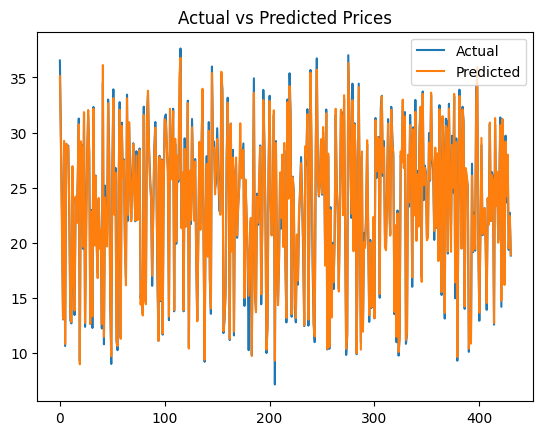

In [2183]:
actual_predict_plot(y_mgm_test, y_mgm_pred, 'Actual', 'Predicted' )

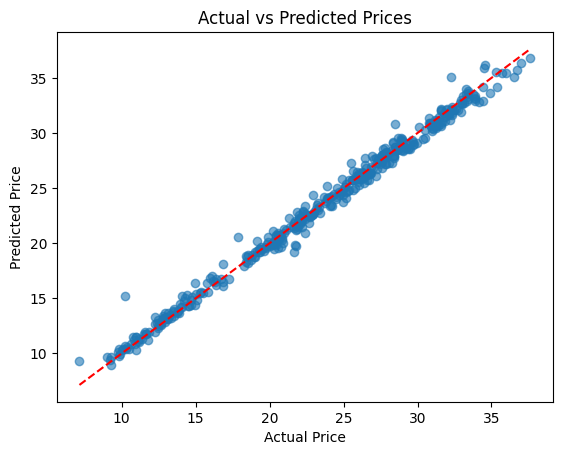

In [2184]:
scatter_plot(y_mgm_test,y_mgm_pred,'Actual', 'Predicted')

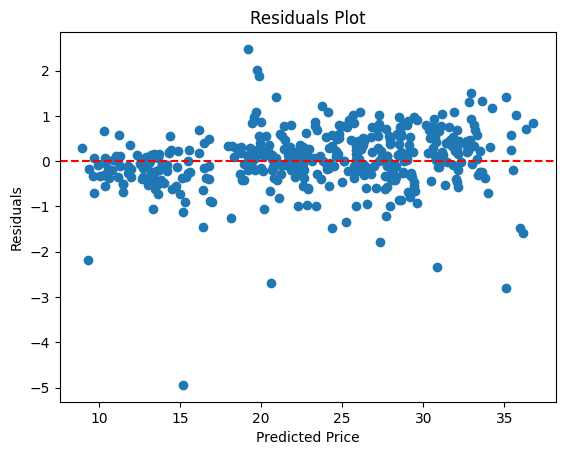

In [2185]:
residual_plot(y_mgm_test,y_mgm_pred, 'red')

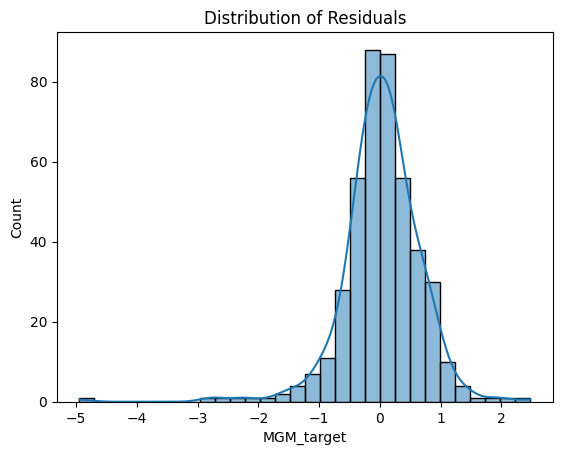

In [2186]:
histgraph(y_mgm_test,y_mgm_pred)

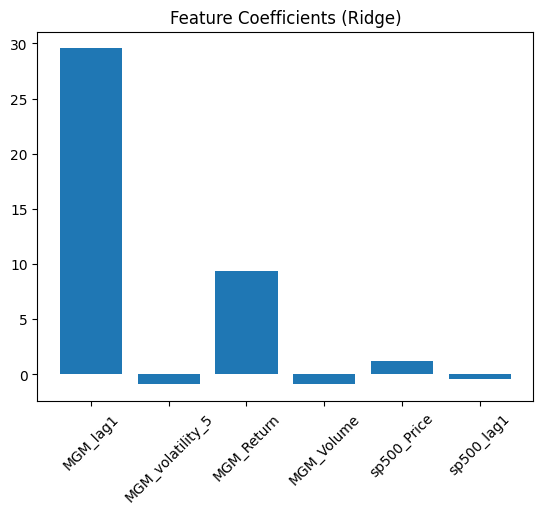

In [2187]:
feature_importance_plot(X_mgm, model_mgm)

PERFORMING T-TEST FOR THE HYPOTHESIS

In [2188]:
aapl_errors = np.abs(y_test - y_pred)
mgm_errors = np.abs(y_mgm_test - y_mgm_pred)

In [2189]:
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(mgm_errors, aapl_errors)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -13.0126
P-value: 0.0000


In [2190]:


stats_table = pd.DataFrame({
    'Stock': ['AAPL', 'MGM'],
    'Mean Absolute Error': [aapl_errors.mean(), mgm_errors.mean()],
    'Standard Deviation': [aapl_errors.std(), mgm_errors.std()]
})

# Add t-test result separately
print(stats_table)
print(f"\nPaired T-test Result:\nT-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")


  Stock  Mean Absolute Error  Standard Deviation
0  AAPL             2.840125            3.937267
1   MGM             0.449723            0.466931

Paired T-test Result:
T-statistic: -13.0126, P-value: 0.0000


From the t-test above p-value < 0.05, WE DISAPPROVE the hypothesis that say Ridge Regression does not prefrom better on AAPL predictions than MGM (Accept H0).because Ridge prediction of MGM resort is better that APPLE with MAE 0.403570 , and std of 0.451264

RANDOMFORESTCLASSFIER ON APPLE AND MGM RESORT

APPLE RANDOMFOREST

In [2191]:
from sklearn.ensemble import RandomForestRegressor
rf_model_aapl = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_aapl.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [2192]:
y_rfaapl_pred = rf_model_aapl.predict(X_test)

mse_rfaapl = mean_squared_error(y_test, y_rfaapl_pred)
mae_rfaapl = mean_absolute_error(y_test, y_rfaapl_pred)
r2_rfaapl = r2_score(y_test, y_rfaapl_pred)

print(f"Random Forest R² Score: {r2_rfaapl:.4f}")
print(f"Mean Squared Error (MSE): {mse_rfaapl:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rfaapl:.4f}")

Random Forest R² Score: 0.9966
Mean Squared Error (MSE): 17.1760
Mean Absolute Error (MAE): 2.1475


MGM RESORT RANDOMFOREST

In [2193]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_mgm_train, y_mgm_train)

RandomForestRegressor(random_state=42)

In [2194]:
y_rfmgm_pred = rf_model.predict(X_mgm_test)

mse_rfmgm = mean_squared_error(y_mgm_test, y_rfmgm_pred)
mae_rfmgm = mean_absolute_error(y_mgm_test, y_rfmgm_pred)
r2_rfmgm= r2_score(y_mgm_test, y_rfmgm_pred)

print(f"Random Forest R² Score: {r2_rfmgm:.4f}")
print(f"Mean Squared Error (MSE): {mse_rfmgm:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rfmgm:.4f}")

Random Forest R² Score: 0.9911
Mean Squared Error (MSE): 0.4402
Mean Absolute Error (MAE): 0.4366
